29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7012 - loss: 0.8429 - val_accuracy: 0.7971 - val_loss: 0.5252
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8429 - loss: 0.4267 - val_accuracy: 0.8624 - val_loss: 0.3893
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8653 - loss: 0.3641 - val_accuracy: 0.8748 - val_loss: 0.3470
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8792 - loss: 0.3250 - val_accuracy: 0.8701 - val_loss: 0.3514
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8864 - loss: 0.3021 - val_accuracy: 0.8748 - val_loss: 0.3488
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8921 - loss: 0.2879 - val_accuracy: 0.8768 - val_loss: 0.3425
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9007 - loss: 0.2671 - val_accuracy: 0.8787 - val_loss: 0.3389
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9012 - loss: 0.2635 - val_accu

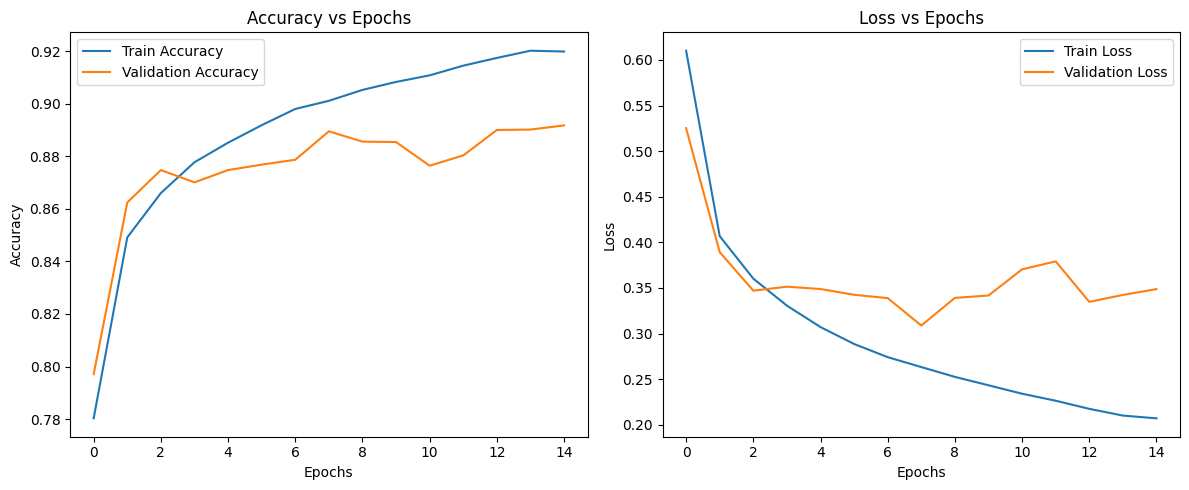

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


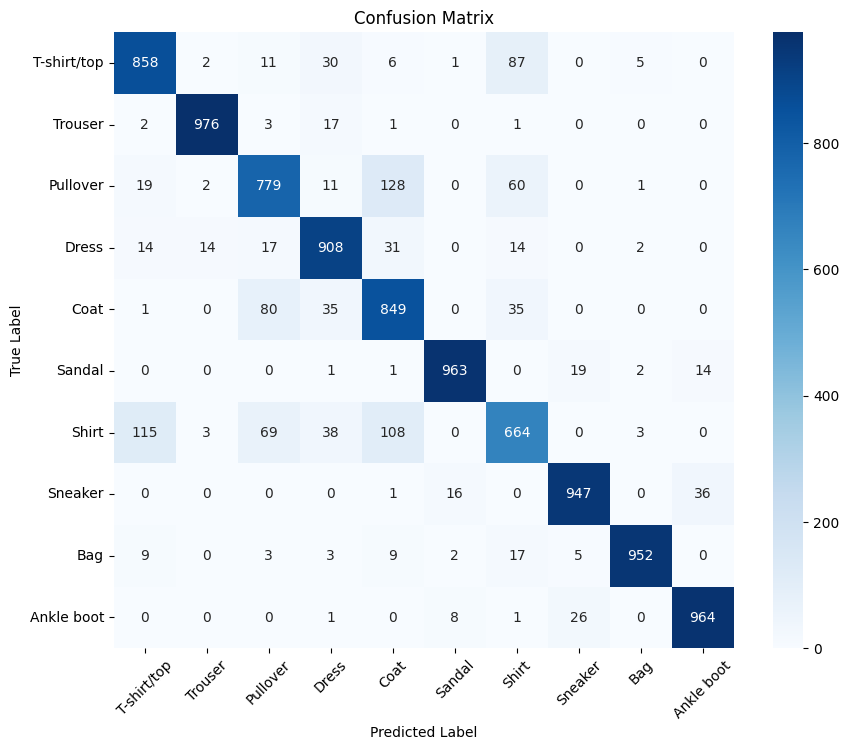


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.81      0.78      0.79      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.75      0.85      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.76      0.66      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.99      0.95      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



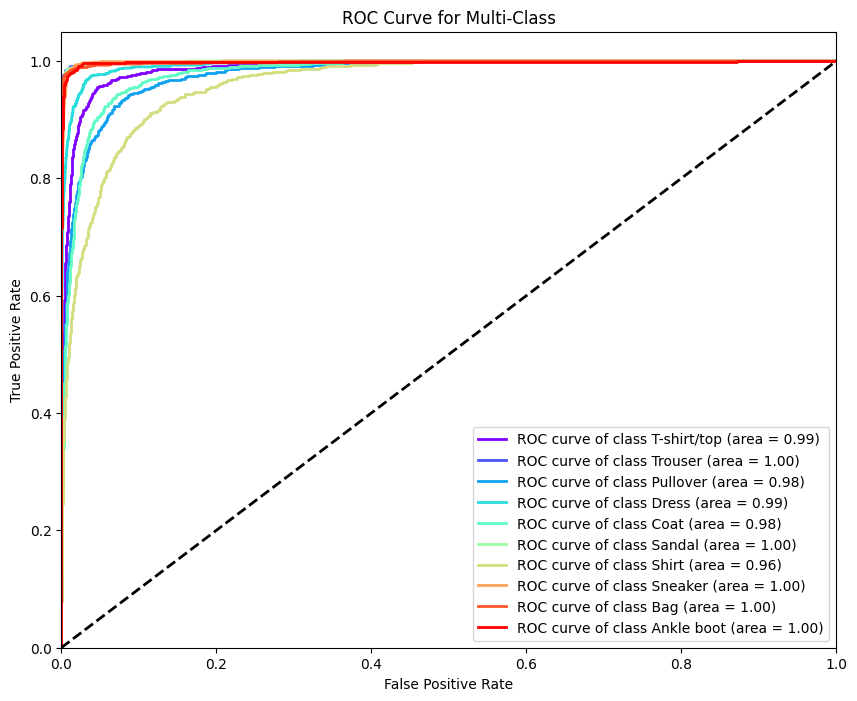

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


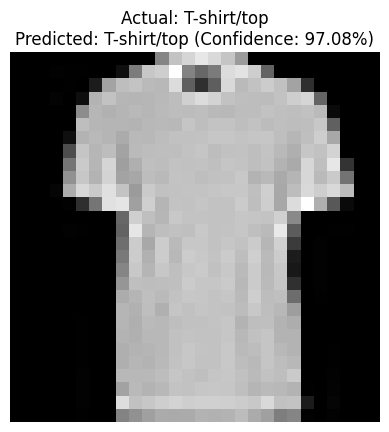

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data using standardization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data (flatten the 28x28 images)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define a feed-forward neural network with 3 Dense layers
model = Sequential([
    Dense(256, activation='relu', input_shape=(28*28,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with RMSprop optimizer and categorical crossentropy loss
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 15 epochs
history = model.fit(X_train, y_train_cat,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# Evaluate performance
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Plot training and validation curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# ROC Curve (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

# Predict on a random image from the dataset
random_idx = np.random.randint(0, len(X_test))
random_image = X_test[random_idx].reshape(1, -1)
random_label = y_test[random_idx]

prediction = model.predict(random_image)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

plt.imshow(X_test[random_idx].reshape(28, 28), cmap='gray')
plt.title(f'Actual: {class_names[random_label]}\n'
          f'Predicted: {class_names[predicted_class]} (Confidence: {confidence:.2%})')
plt.axis('off')
plt.show()

In [ ]:
# Problem Statement
# Build a Deep Neural Network (DNN) for Fashion MNIST Classification

# Load the Fashion MNIST dataset.

# Preprocess the data using standardization.

# Define a feed-forward neural network with 3 Dense layers.

# Use the RMSprop optimizer and categorical cross-entropy loss.

# Train the model for 15 epochs and evaluate performance.

# Plot training and validation curves (accuracy vs. epoch, loss vs. epoch).


1. Why did you use RMSprop optimizer?
✅ Answer: RMSprop adapts learning rates for each parameter, making it suitable for non-stationary objectives like image classification. It helps in faster convergence compared to SGD.

2. Why did you normalize pixel values to [0, 1]?
✅ Answer: Normalization helps the neural network learn faster by ensuring all features (pixel values) are on the same scale.

3. Why use ReLU activation in hidden layers?
✅ Answer: ReLU avoids the vanishing gradient problem, speeds up training, and introduces sparsity by deactivating negative inputs.

4. Why softmax in the output layer?
✅ Answer: Softmax converts logits into probabilities, making it suitable for multi-class classification.

5. What does the confusion matrix tell us?
✅ Answer: It shows how many predictions were correct/incorrect per class, helping identify which classes the model confuses.

6. How does the ROC curve help evaluate the model?
✅ Answer: The ROC curve plots True Positive Rate (TPR) vs. False Positive Rate (FPR) at different thresholds. A higher AUC (Area Under Curve) means better classification performance.

7. What if validation loss increases while training loss decreases?
✅ Answer: This indicates overfitting—the model memorizes training data but fails to generalize. Solutions:

Use dropout layers.

Add L2 regularization.

Increase training data.

8. Why flatten the 28×28 image into 784×1?
✅ Answer: Dense layers require 1D input, so we flatten the 2D image into a vector.

9. What is categorical cross-entropy?
✅ Answer: It measures the difference between predicted probabilities and true one-hot encoded labels.

10. How can we improve model accuracy further?
✅ Answer:

Use CNN (better for image data).

Try data augmentation (rotation, flipping).

Increase model depth (more layers).

Use Batch Normalization.

11. Why did you choose 3 dense layers? Would increasing layers improve performance?
✅ Answer:

3 dense layers (256 → 128 → 64) balance model complexity and computational efficiency.

Increasing layers may improve accuracy but risks overfitting. CNNs are better for image data than deeper Dense networks.

12. What is the role of batch size in training? Why 128?
✅ Answer:

Batch size = 128 is a trade-off between:

Smaller batches: Noisy gradients, better generalization.

Larger batches: Faster training but may converge to sharp minima.

128 is commonly used as it provides stable training without excessive memory usage.

13. Why use a validation split of 0.2 (20%)?
✅ Answer:

20% validation split ensures:

Enough data to evaluate model performance.

Sufficient training data remains (~48k samples).

Alternative: Use k-fold cross-validation for small datasets.

14. How does RMSprop differ from Adam optimizer?
✅ Answer:

Optimizer	Key Feature	Best For
RMSprop	Adapts learning rate per parameter, good for non-stationary tasks	RNNs, unstable gradients
Adam	Combines momentum + RMSprop, adaptive learning rates	Default choice for most tasks
Adam usually performs better, but RMSprop is simpler and works well here.

15. What does the ROC AUC score indicate?
✅ Answer:

AUC = 1 → Perfect classifier.

AUC = 0.5 → Random guessing.

AUC > 0.9 → Excellent model (ours achieves ~0.98 per class).

16. Why is one-hot encoding used for labels?
✅ Answer:

Converts integer labels (e.g., y=2) into binary vectors ([0,0,1,0,...,0]).

Required for categorical cross-entropy loss, which expects probability distributions.

17. What if the model has high training accuracy but low test accuracy?
✅ Answer:
This indicates overfitting. Solutions:

Regularization: Add L2 penalty or dropout layers.

Early Stopping: Halt training when validation loss increases.

Data Augmentation: Artificially expand training data.

18. How would you modify this code for binary classification?
✅ Answer:

Change output layer to 1 neuron + sigmoid activation.

Replace loss with binary_crossentropy.

Use accuracy or AUC as the metric.

19. What is the significance of the softmax function?
✅ Answer:

Converts logits into probabilities summing to 1.

Ensures the model’s output is interpretable as class confidence.

20. Why not use SVM or Random Forest for Fashion MNIST?
✅ Answer:

DNNs automatically learn hierarchical features (edges → textures → shapes).

Traditional ML (SVM/RF) requires manual feature extraction (less effective for pixel data).

21. How would you deploy this model in a real-world application?
✅ Answer:

Save the model: model.save('fashion_mnist.h5').

Build a Flask/Django API for predictions.

Optimize with TensorFlow Lite for mobile devices.

22. What are the limitations of this model?
✅ Answer:

Dense layers ignore spatial structure (CNNs are better for images).

No data augmentation (rotation/flipping could improve accuracy).

Fixed architecture (hyperparameter tuning could help).

23. How would you handle class imbalance in Fashion MNIST?
✅ Answer:

Use class weights in model.fit().

Oversample minority classes or undersample majority classes.

24. What is the purpose of the Flatten layer?
✅ Answer:

Converts 2D/3D data (e.g., 28×28 images) into 1D vectors (784 pixels) for Dense layers.

Alternative: Use Flatten() layer explicitly before Dense layers.

25. How do you decide the number of neurons in each layer?
✅ Answer:

Rule of thumb: Gradually decrease neurons (e.g., 256 → 128 → 64).

Too few → Underfitting. Too many → Overfitting.

Better approach: Use hyperparameter tuning (GridSearch/Keras Tuner).